In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = "C:\\Users\\brand\\Documents\\Thesis Research\\Anomaly-Detection-Thesis\\Benchmark CSVs\\"

cnn_df = pd.read_csv(path + "CNN.csv")
hbos_df = pd.read_csv(path + "HBOS.csv")
iforest_df = pd.read_csv(path + "IForest.csv")
lof_df = pd.read_csv(path + "LOF.csv")
ocsvm_df = pd.read_csv(path + "OCSVM.csv")
omnianomaly_df = pd.read_csv(path + "OmniAnomaly.csv")
pca_df = pd.read_csv(path + "PCA.csv")
usad_df = pd.read_csv(path + "USAD.csv")

In [12]:
# columns = ['AUC-PR', 'AUC-ROC', 'VUS-PR', 'VUS-ROC', 'Standard-F1', 'PA-F1', 'Event-based-F1', 'R-based-F1', 'Affiliation-F']
# model_dfs = ['cnn_df', 'hbos_df', 'iforest_df', 'lof_df', 'ocsvm_df', 'omnianomaly_df', 'pca_df', 'usad_df']


# 1. Your list of columns to analyze
columns = ['AUC-PR', 'AUC-ROC', 'VUS-PR', 'VUS-ROC', 'Standard-F1', 'PA-F1', 'Event-based-F1', 'R-based-F1', 'Affiliation-F']

# 2. Put your ACTUAL dataframe variables into a list
#    (Note: These are the variables you created, not strings)
all_models = [cnn_df, hbos_df, iforest_df, lof_df, ocsvm_df, omnianomaly_df, pca_df, usad_df]

# 3. Create a matching list of names for labeling
model_names = ['CNN', 'HBOS', 'IForest', 'LOF', 'OCSVM', 'OmniAnomaly', 'PCA', 'USAD']

summary_list = []

for df, name in zip(all_models, model_names):
    # Calculate the mean of the metrics for this model
    means = df[columns].mean()
    means.name = name  # Set the name of the row to the model name
    summary_list.append(means)

# Combine into one dataframe
comparison_table = pd.concat(summary_list, axis=1).T

print("\n\n--- MASTER PERFORMANCE TABLE (AVERAGES) ---")
# Adjust pandas settings to ensure the whole table prints
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(comparison_table.round(4))



--- MASTER PERFORMANCE TABLE (AVERAGES) ---
             AUC-PR  AUC-ROC  VUS-PR  VUS-ROC  Standard-F1   PA-F1  Event-based-F1  R-based-F1  Affiliation-F
CNN          0.3456   0.7663  0.3496   0.8037       0.4098  0.8251          0.6420      0.3005         0.8673
HBOS         0.1610   0.6331  0.1902   0.6723       0.2439  0.6670          0.3990      0.2438         0.7963
IForest      0.2106   0.7029  0.2540   0.7484       0.2810  0.6583          0.4046      0.2441         0.8008
LOF          0.0960   0.5338  0.1385   0.5923       0.1512  0.5590          0.3239      0.1471         0.7622
OCSVM        0.2287   0.6085  0.2657   0.6701       0.2795  0.4764          0.4115      0.2997         0.8033
OmniAnomaly  0.3722   0.7444  0.4237   0.7774       0.4433  0.6271          0.5284      0.4288         0.8414
PCA          0.2409   0.6759  0.2754   0.7117       0.3120  0.5118          0.3698      0.3277         0.7887
USAD         0.3626   0.7384  0.4121   0.7717       0.4331  0.6223        

In [13]:
# 1. Setup the lists (using your existing variables)
model_dfs = [cnn_df, hbos_df, iforest_df, lof_df, ocsvm_df, omnianomaly_df, pca_df, usad_df]
model_names = ['CNN', 'HBOS', 'IForest', 'LOF', 'OCSVM', 'OmniAnomaly', 'PCA', 'USAD']

# 2. Add a 'Model_Name' column to each dataframe temporarily so we can distinguish them
combined_list = []
for df, name in zip(model_dfs, model_names):
    temp_df = df.copy()
    temp_df['Model_Name'] = name
    combined_list.append(temp_df)

# 3. Concatenate into one big dataframe
master_df = pd.concat(combined_list, ignore_index=True)

# 4. Melt the dataframe for easy plotting (Converts metrics into rows)
#    This makes it easy to "Facet" (create small subplots for each metric)
columns_to_plot = ['AUC-PR', 'AUC-ROC', 'VUS-PR', 'VUS-ROC', 'Standard-F1', 'PA-F1', 'Event-based-F1', 'R-based-F1', 'Affiliation-F']
melted_df = master_df.melt(id_vars=['Model_Name'], value_vars=columns_to_plot, var_name='Metric', value_name='Score')

print("Data prepared for plotting!")

Data prepared for plotting!


C:\Users\brand\AppData\Local\Temp\ipykernel_24828\3636721551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


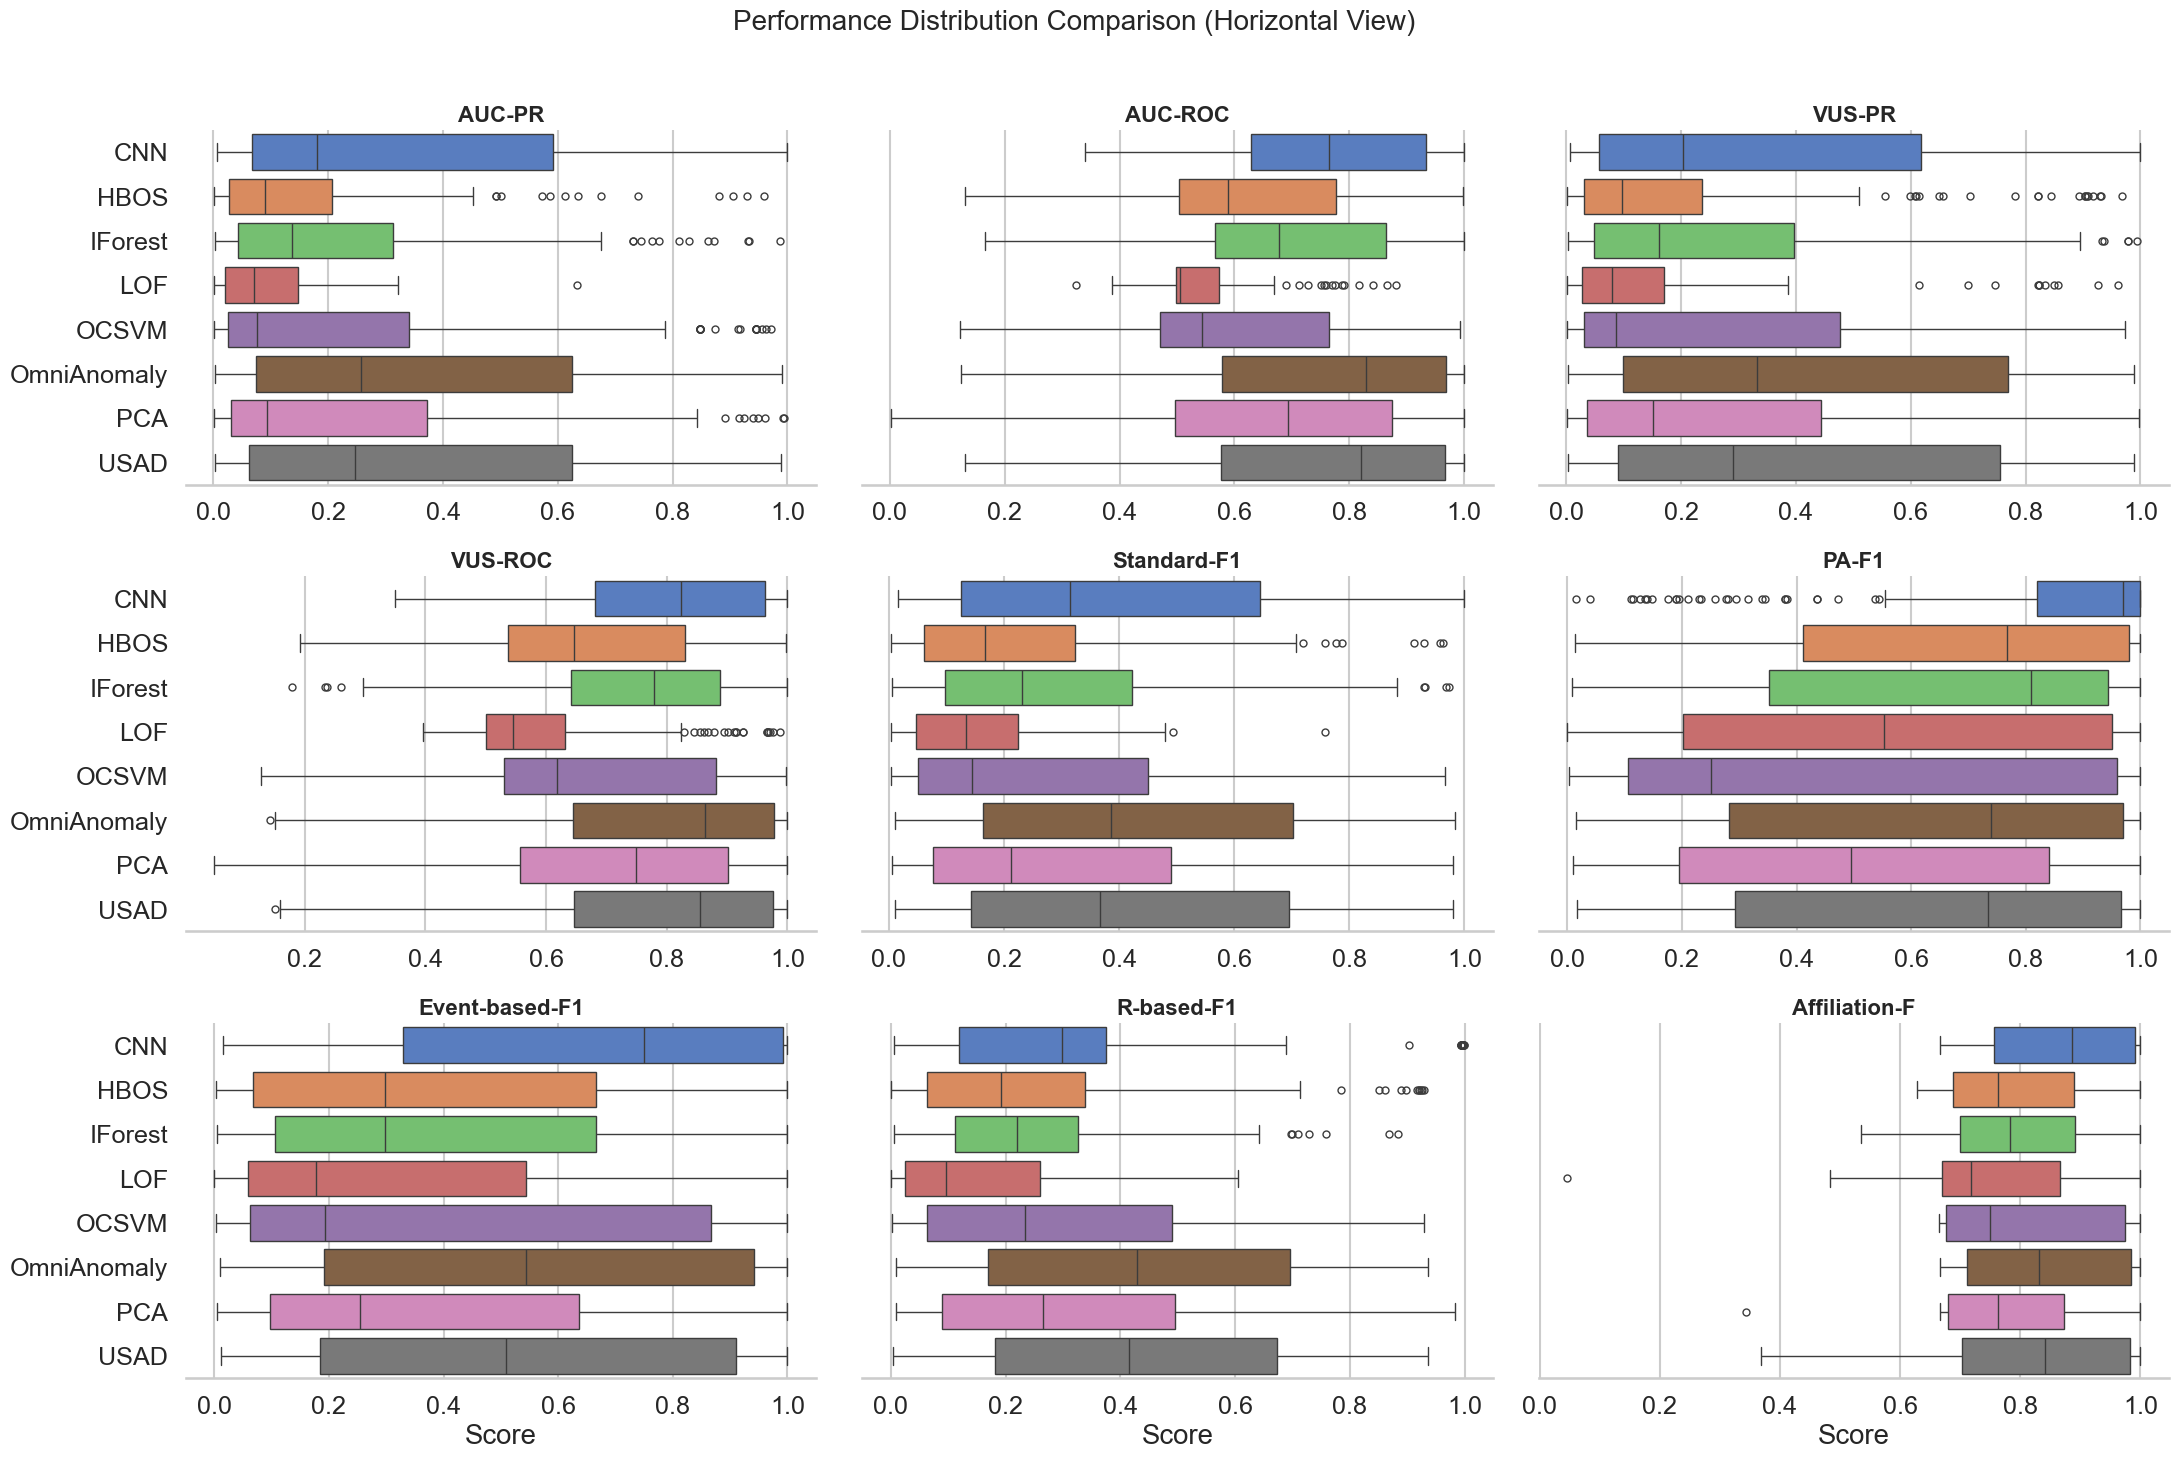

In [19]:
#1. Set a clean theme with larger font
sns.set_theme(style="whitegrid", context="talk", font_scale=1.1)

# 2. Create the plot
# Key changes: y='Model_Name', x='Score', orient='h'
g = sns.catplot(
    data=melted_df,
    y='Model_Name',     # Put Models on the Y-axis for readability
    x='Score',          # Put Scores on the X-axis
    col='Metric',       # Create a separate chart for each Metric
    col_wrap=3,         # 3 charts per row fits nicely on most screens
    kind='box',
    orient='h',         # Explicitly make it horizontal
    height=5,           # Taller plots
    aspect=1.5,         # Wider plots
    palette='muted',  # Nice colors
    sharex=False        # Important: Let each metric have its own score range
)

# 3. Clean up the labels
g.set_titles("{col_name}", size=16, fontweight='bold') # Set bigger titles for subplots
g.set_axis_labels("Score", "") # Remove the redundant Y-axis label ("Model_Name")
g.despine(left=True) # Remove left border line for a cleaner look

# Adjust layout to prevent cutting off titles
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Performance Distribution Comparison (Horizontal View)', fontsize=20, y=0.98)

plt.show()

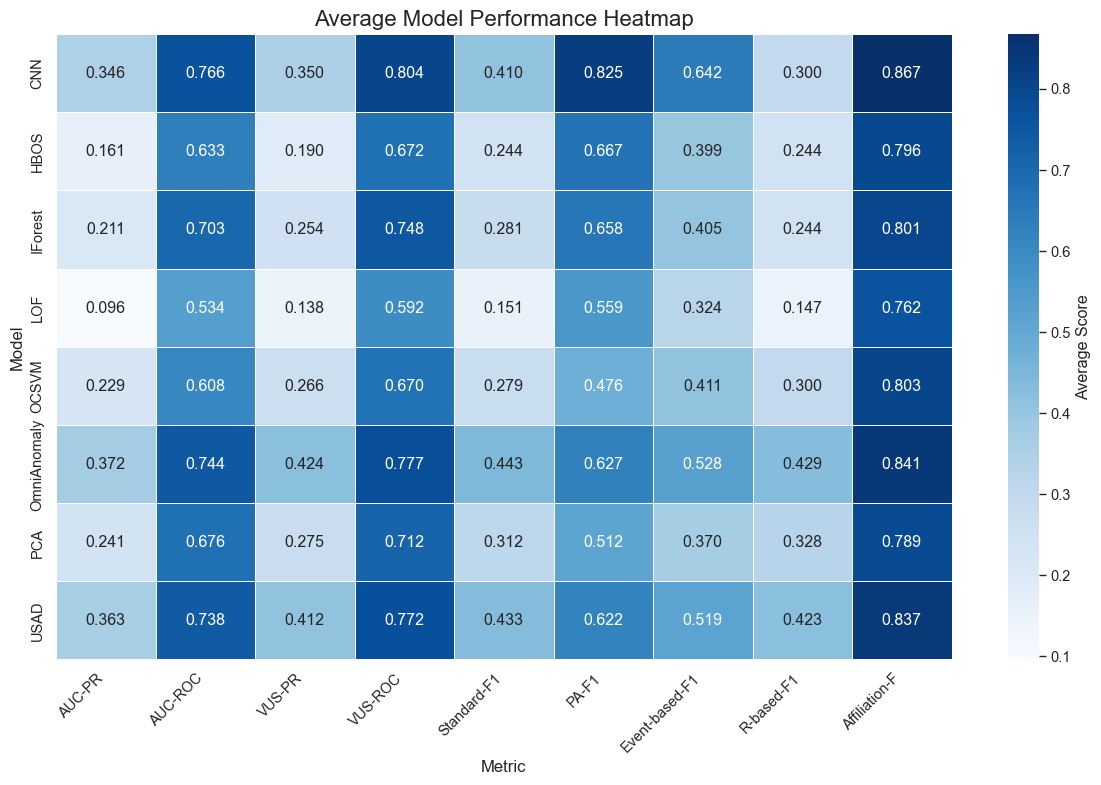

In [15]:
# 1. Calculate the MEAN score for every Model/Metric combination
summary_table = master_df.groupby('Model_Name')[columns_to_plot].mean()

# 2. Create the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    summary_table, 
    annot=True,     # Show the actual numbers in the boxes
    fmt=".3f",      # Format to 3 decimal places
    cmap="Blues",   # Color map (try 'RdYlGn' for Red-Yellow-Green)
    linewidths=.5, 
    cbar_kws={'label': 'Average Score'}
)

plt.title('Average Model Performance Heatmap', fontsize=16)
plt.ylabel('Model', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()